

# L'OLIMPO DEL CINEMA


# Obiettivi dello studio:
Questo studio si propone di analizzare, attraverso i database dell'archivio di [IMDb](https://www.imdb.com/interfaces/) e un dataframe costruito attraverso tecniche di web scraping, quali sono sia i migliori film della storia, che i migliori registi secondo il pubblico di IMDb stesso. Utilizzando tecniche statistiche come la costruzione di indici e tecniche di scaling e normalizzazione, questa analisi permetterà di valutare:
- quali sono i migliori 100 film di sempre secondo il pubblico,
- la reputazione dei registi secondo il pubblico (top 100 anche per loro),
- l'impatto che il budget ha sulla qualità dei film,
- quanto i top registi spendono in media per girare un film
- nell'olimpo del cinema (ovvero i migliori 6000 film secondo il pubblico) quanti sono i film che vanno in negativo?
- e molto altro

## Struttura:
lo studio è strutturato in 5 fasi in cui:
- fase I: importiamo il df principale di IMDb, lo puliamo e lo analizziamo
- fase II: faremo un merge (o JOIN) con gli altri df di IMDb
- fase III: costruiremo un indicatore di gradimento per ogni film e troveremo i 100 migliori film secondo il pubblico
- fase IV: IMDb non ci da a disposizione i budget, così li prenderemo in prestito dal sito di [The Numbers](https://www.the-numbers.com/movie/budgets/all) mediante web scraping per poi fare un ulteriore merge col df principale di IMDb
- fase V: proveremo a capire chi sono i registi più apprezzati di sempre (fornendo una top 100) e capiremo se esiste una relazione tra gradimento, budget e incassi vari

N.b: tutte le tabulazioni saranno scaricabili in formato excel attraverso il comando .to_excel("nome_file.xlsx")

**Laddove dovessi trovare utile questi dati ed usarli ti chiedo di menzionarmi.\
Grazie in anticipo e buona visione✌️**

I risultati di questo studio spero forniranno informazioni utili all'industria cinematografica e agli appassionati di cinema.


# Fase I
## Importiamo il dataframe "title.basic" di IMDb
- Inanazitutto filtriamo solo per "movie"
- Una volta filtrato il tutto, iniziamo con qualche analisi descrittiva ed esplorativa

link IMDb: https://www.imdb.com/interfaces/

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as mtp
import numpy as np


basics= pd.read_csv("title.basics.tsv.gz", sep="\t")
basics

C:\Users\utente\AppData\Local\Temp\ipykernel_19888\1838544147.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics= pd.read_csv("title.basics.tsv.gz", sep="\t")


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9585849,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9585850,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9585851,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9585852,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [2]:
basics["titleType"].value_counts()

tvEpisode       7260098
short            912000
movie            634571
video            270071
tvSeries         238017
tvMovie          140276
tvMiniSeries      47084
tvSpecial         40381
videoGame         33433
tvShort            9921
tvPilot               2
Name: titleType, dtype: int64

In [3]:
movie=basics[basics["titleType"]=="movie"].reset_index()
print(movie["endYear"].value_counts())

movie.drop(columns="endYear", inplace=True)
movie

\N    634571
Name: endYear, dtype: int64


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
1,144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
2,498,tt0000502,movie,Bohemios,Bohemios,0,1905,100,\N
3,570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
4,587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
...,...,...,...,...,...,...,...,...,...
634566,9585745,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
634567,9585772,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary
634568,9585784,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,Comedy
634569,9585794,tt9916730,movie,6 Gunn,6 Gunn,0,2017,116,\N


In [4]:
#Trasformiamo runTimes in float, dato che è stato salvato nel db come object
print(movie.dtypes) 
print("-------------------------------")
print(movie["runtimeMinutes"].value_counts())
print("------N.B------------------------")
print("Molti valori sono \\N, dunque rimpiazziamoli con 0 per trasformare runtimeMinutes in int o float")

index              int64
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
runtimeMinutes    object
genres            object
dtype: object
-------------------------------
\N      233922
90       26541
80       11882
60       11548
85       11148
         ...  
435          1
372          1
1320         1
468          1
990          1
Name: runtimeMinutes, Length: 503, dtype: int64
------N.B------------------------
Molti valori sono \N, dunque rimpiazziamoli con 0 per trasformare runtimeMinutes in int o float


In [5]:
movie["runtimeMinutes"]=movie["runtimeMinutes"]\
                        .replace("\\N", "0")\
                        .astype(float)

#abbiamo trasformato i minuti da stringhe a float

#se vogliamo una stima media di quando dura ogni film, per il momento dobbiamo escludere gli 0, che altrimenti apporterebbero troppa distorsione.

### Ci sono molti film che durano un minuto... questo mi fa pensare che si tratti di cortometraggi, inoltre c'è un film che dura ben 59460 minuti!!! 
**Meglio indagare!**


,index,runtimeMinutes
count,4.006490e+05,400649.000000
mean,3.314538e+06,89.947500
std,3.203180e+06,178.326664
min,8.000000e+00,1.000000
25%,1.921780e+05,73.000000
50%,2.446293e+06,89.000000
75%,6.440744e+06,100.000000
max,9.585804e+06,59460.000000


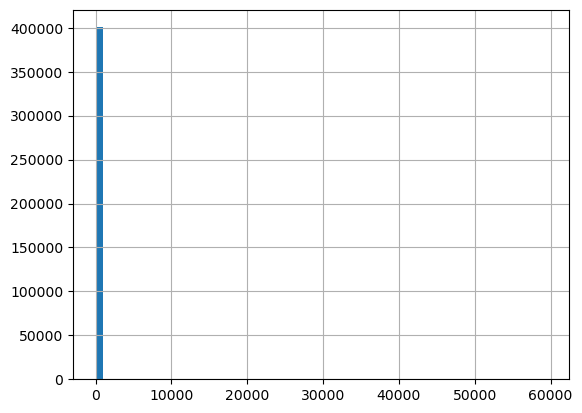

In [6]:
#La distribuzione del minutaggio è totalmente sbilancata  verso la coda sinistra della gaussiana

filtro_minuti=movie[movie["runtimeMinutes"]>0]
filtro_minuti["runtimeMinutes"].hist(bins=60)
filtro_minuti.describe()

In [7]:
#Se si controlla su wikipedia, nessuno di questi film dura così tanto:
filtro_minuti.sort_values(by="runtimeMinutes",ascending=False).head(5) 

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
247006,1437550,tt10844584,movie,100,100,0,2019,59460.0,Drama
429907,5858843,tt22899684,movie,Searching for America: Parts I & II,Searching for America: Parts I & II,0,\N,54321.0,Documentary
604100,8829364,tt8273150,movie,Logistics,Logistics,0,2012,51420.0,Documentary
493161,6849172,tt3854496,movie,Ambiancé,Ambiancé,0,2020,43200.0,Documentary
278193,2230976,tt12277054,movie,Carnets Filmés (Liste Complète),Carnets Filmés (Liste Complète),0,2019,28643.0,Documentary


### Controllando su internet è facilmente constatabile che questi film non durano così tanto: ovviamente c'è un errore di trascrizione nel database. Come procedere?
 Secondo wikipedia i lungometraggi sono film che durano almeno **60 minuti**. Ma qual è la durata massima? Purtroppo non esiste una risposta definitiva a questa domanda. Secondo wikipedia il film più lungo della storia del cinema è 'The cure for insomnia' che "è stato mostrato per intero alla School of Art Institute a Chicago[..] e non è mai stato reso disponibile al pubblico (https://it.wikipedia.org/wiki/The_Cure_for_Insomnia).


**Personalmente escluderei film sperimentali come quello mensionato precedentemente e proseguirei filtrando per una specifica condizione: durata > 60 min e < 360 min.**


P.S: Se ti stai domandando perchè proprio 360 minuti,la risposta è: perchè film come c'era una volta in America, Apocalypse now, o '900 durano circa 220-250 min in media. Io ho voluto mettere un margine più ampio per includere eventuali extended version o altro.


P.P.S: Se non sei daccordo col mio modus operandi sei libero di cambiare il codice a tuo piacimento ed impostare i minuti che desideri

count    352851.000000
mean         93.928514
std          23.391059
min          60.000000
25%          80.000000
50%          90.000000
75%         102.000000
max         360.000000
Name: runtimeMinutes, dtype: float64


<AxesSubplot:>

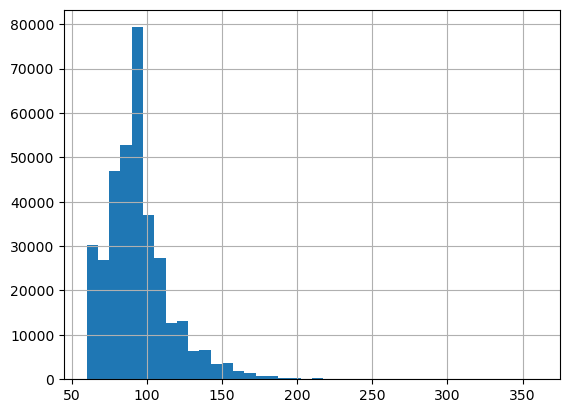

In [8]:
#Filtriamo per i criteri pensati precedentemente

film=movie[(movie["runtimeMinutes"]>=60)& (movie["runtimeMinutes"]<=360)]

print(film["runtimeMinutes"].describe())
film["runtimeMinutes"].hist(bins=40)

In [9]:
film["genres"].value_counts().head(10)

Drama             64403
Documentary       43639
Comedy            27710
\N                20923
Comedy,Drama      10078
Drama,Romance      9672
Horror             7064
Comedy,Romance     5523
Thriller           5159
Action             4935
Name: genres, dtype: int64

# Fase II: MERGIAMO!
###  In questa parte del progetto faremo un merge con gli altri df reperibili sul sito di IMDb, nello specifico:
- Il dataset contenente il numero di commenti e il voto medio per ogni film (il rating va da 1 a 10);
- Il dataset contenente il nome dei membri del cast, in particolare i registi

### Una volta mergiati e puliti i dati, procederemo col calcolare un **indicatore di gradimento** per ogni film e condurremo qualche analisi descrittiva ed esplorativa


**Ma se avremo già la media di stelle, che senso ha calcolarsi un indicatore di gradimento?** L'indicatore darà peso sia al voto del pubblico che al numero di commenti, evitando che il film girato col cellulare da mio cugino che ha preso come media 5 stelle su 5 (perchè l'abbiamo votato io, mia madre e mia nonna) risulti tra i primi in classifica


p.s (da leggere solo se sei mio cugino): Mario, senza rancore!

In [10]:
#importiamo rating 
rating=pd.read_csv("title.ratings.tsv.gz",sep="\t")
rating.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1948
1,tt0000002,5.8,264
2,tt0000003,6.5,1778
3,tt0000004,5.6,179
4,tt0000005,6.2,2582


In [11]:
#facciamo un merge left_on tra film e ratings
film_rated=pd.merge(film,rating, how="left", on="tconst")

### I missing values sono 108614 per entrambe le series:
Escludiamo i missing values dal nostro nuovo df

In [12]:
print("I missing values di della media dei rating sono:", film_rated["averageRating"].isna().sum())
print("I missing values del numero di voti sono",film_rated["numVotes"].isna().sum())


I missing values di della media dei rating sono: 108614
I missing values del numero di voti sono 108614


In [13]:
#escludiamo i missing
film_rated=film_rated.dropna()

## Come si distribuiscono i voti e l'avarage rating?
Prima di costruire il nostro indicatore di gradimento, è meglio osservare graficamente qualche statistica sulla distribuzione di entrambi i valori

count    244237.000000
mean          6.136225
std           1.324857
min           1.000000
25%           5.300000
50%           6.200000
75%           7.000000
max          10.000000
Name: averageRating, dtype: float64


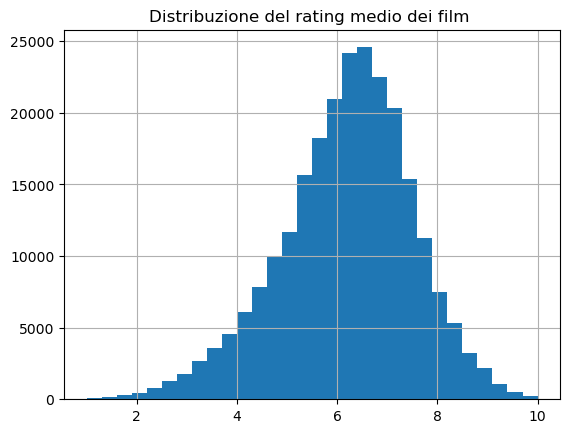

In [14]:
film_rated.describe()
print(film_rated["averageRating"].describe())

film_rated["averageRating"].hist(bins=30)
mtp.title("Distribuzione del rating medio dei film ")
mtp.show()

### A differenza di averageRating, numVotes ha una distribuzione molto sbilanciata a sinistra:
La maggior parte dei film ha una media di voti molto bassa, mentre sono solo pochi i film che hanno ricevuto molti voti: presumibilmente film molto mainstream:
- in seguito creeremo un indicatore per escludere la maggior parte di questi film e bilanciare la distribuzione

Text(0.5, 1.0, 'Distribuzione del numero di voti per film')

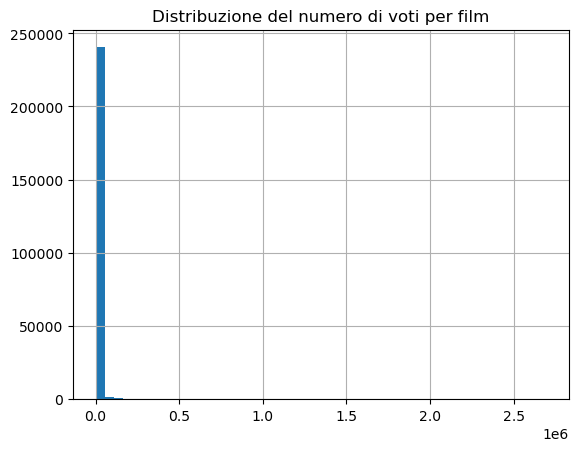

In [15]:
film_rated["numVotes"].hist(bins=50)
mtp.title("Distribuzione del numero di voti per film")

### Prima di passare alla fase III (ovvero la costruzione dell'indice), finiamo di mergiare gli altri dataset che ci servono


In [16]:
#un po di pulizia per mergiare: ho cambiato directors in nconst perchè sarà la primarykey per il primo merge
title_crew=pd.read_csv("title.crew.tsv.gz", sep="\t")
title_crew.rename(columns={"directors":"nconst"}, inplace=True)

nome_basics=pd.read_csv("name.basics.tsv.gz", sep="\t")

regista=pd.merge(title_crew,nome_basics, on="nconst")


In [17]:
completo=pd.merge(film_rated,regista, how="left", on="tconst")
completissimo=completo[['nconst','tconst','primaryTitle', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres', 'averageRating','numVotes','primaryName', 'birthYear','deathYear', 'primaryProfession']]
completissimo

,nconst,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,primaryName,birthYear,deathYear,primaryProfession
0,nm0714557,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100.0,"Documentary,News,Sport",5.2,466.0,Enoch J. Rector,1863,1957,"director,cinematographer,editor"
1,nm0063413,tt0000502,Bohemios,Bohemios,1905,100.0,\N,4.1,15.0,Ricardo de Baños,1884,1939,"director,cinematographer,writer"
2,nm0846879,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography",6.0,807.0,Charles Tait,1868,1933,"director,writer"
3,nm0141150,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90.0,Drama,4.4,20.0,Michel Carré,1865,1945,"director,writer,actor"
4,NaN,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120.0,"Adventure,Fantasy",5.2,67.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244232,nm7308376,tt9916190,Safeguard,Safeguard,2020,95.0,"Action,Adventure,Thriller",3.7,241.0,Fraser Precious,\N,\N,"production_manager,actor,producer"
244233,nm1480867,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84.0,Thriller,5.8,1390.0,Giacomo Cimini,1977,\N,"director,writer,producer"
244234,nm1893148,tt9916362,Coven,Akelarre,2020,92.0,"Drama,History",6.4,5162.0,Pablo Agüero,1977,\N,"director,writer,producer"
244235,nm4457074,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,8.3,6.0,Azhar Kinoi Lubis,\N,\N,"director,assistant_director"


In [18]:
#Abbiamo qualche missing values per quanto riguarda le info sul regista.
completissimo.isna().sum()
completissimo=completissimo.fillna("-")

# FASE III: I migliori 100 film secondo il pubblico
### Per comprendere quali sono i 100 migliori film secondo il pubblico, costruiremo un indicatore di gradimento:
L'indicatore sarà costruito a partire dalle series numVote e averageRating nel seguente modo:
- Normalizzazione logaritmica di numVote: usando log a base naturale livelliamo l'estremità sinistra della distribuzione che è eccessivamente sbilanciata. Si, il log(e) apporterà una notevole distorsione alla nostra distribuzione: questo perchè poi normalizzeremo il log stesso in scala 0-1 (dividendo le xi per il loro massimo) e lo moltiplicheremo con l'average rating (dividendo anche le sue xi con il max). Così otterremo un indicatore che da peso ad entrambe le series, non sbilanciandosi troppo nella series numVote, ergo non mettendo in prima posizione solo ed esclusivamente i soliti blockbusters

- n.b : se non ti sei daccordo nell'usare il log(e), in quanto credi che apporti troppa distorsione, puoi non usarlo e dividere solo per il massimo o adottare altre tecniche di scaling! 


In [19]:
#scaling log(e)
completissimo["numVotes_log"]=np.log(completissimo["numVotes"])

completissimo["numVotes_normalizzato"]=completissimo["numVotes_log"]/max(completissimo["numVotes_log"])
completissimo["averageRating_normalizzato"]=completissimo["averageRating"]/max(completissimo["averageRating"])

## And the winner is...
Al 3° posto troviamo 'il padrino' (The Godfathe), seguito da 'il cavaliere oscuro' (The Dark Knight) e al primo posto...	
'le ali della libertà' (The Shawshank Redemption)



In [20]:
#L'idicatore di gradimento sarà un numero che va da 1 a 10 
completissimo["INDICATORE_GRADIMENTO"]=completissimo["averageRating_normalizzato"]*completissimo["numVotes_normalizzato"]*10
top_100=(completissimo.sort_values(by="INDICATORE_GRADIMENTO", ascending=False))\
    .reset_index()\
    .head(100)
top_100

,index,nconst,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,primaryName,birthYear,deathYear,primaryProfession,numVotes_log,numVotes_normalizzato,averageRating_normalizzato,INDICATORE_GRADIMENTO
0,56293,nm0001104,tt0111161,The Shawshank Redemption,The Shawshank Redemption,1994,142.0,Drama,9.3,2695887.0,Frank Darabont,1959,\N,"writer,producer,director",14.807238,1.000000,0.93,9.300000
1,116549,nm0634240,tt0468569,The Dark Knight,The Dark Knight,2008,152.0,"Action,Crime,Drama",9.0,2669915.0,Christopher Nolan,1970,\N,"writer,producer,director",14.797557,0.999346,0.90,8.994116
2,32669,nm0000338,tt0068646,The Godfather,The Godfather,1972,175.0,"Crime,Drama",9.2,1870922.0,Francis Ford Coppola,1939,\N,"producer,director,writer",14.441942,0.975330,0.92,8.973035
3,71110,nm0001392,tt0167260,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003,201.0,"Action,Adventure,Drama",9.0,1857170.0,Peter Jackson,1961,\N,"producer,director,writer",14.434564,0.974832,0.90,8.773485
4,56157,nm0000233,tt0110912,Pulp Fiction,Pulp Fiction,1994,154.0,"Crime,Drama",8.9,2069502.0,Quentin Tarantino,1963,\N,"writer,actor,producer",14.542819,0.982143,0.89,8.741069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,57144,nm0000520,tt0113277,Heat,Heat,1995,170.0,"Action,Crime,Drama",8.3,661502.0,Michael Mann,1943,\N,"producer,writer,director",13.402268,0.905116,0.83,7.512463
96,78910,-,tt0198781,"Monsters, Inc.","Monsters, Inc.",2001,92.0,"Adventure,Animation,Comedy",8.1,916230.0,-,-,-,-,13.728023,0.927116,0.81,7.509637
97,131431,nm1218281,tt10872600,Spider-Man: No Way Home,Spider-Man: No Way Home,2021,148.0,"Action,Adventure,Fantasy",8.2,766560.0,Jon Watts,1981,\N,"director,producer,writer",13.549668,0.915071,0.82,7.503579
98,49441,nm0000229,tt0097576,Indiana Jones and the Last Crusade,Indiana Jones and the Last Crusade,1989,127.0,"Action,Adventure",8.2,760871.0,Steven Spielberg,1946,\N,"producer,writer,director",13.542219,0.914568,0.82,7.499454


In [21]:
top_100.head(50) #i primi 50 film più apprezzati dal pubblico

,index,nconst,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,primaryName,birthYear,deathYear,primaryProfession,numVotes_log,numVotes_normalizzato,averageRating_normalizzato,INDICATORE_GRADIMENTO
0,56293,nm0001104,tt0111161,The Shawshank Redemption,The Shawshank Redemption,1994,142.0,Drama,9.3,2695887.0,Frank Darabont,1959,\N,"writer,producer,director",14.807238,1.000000,0.93,9.300000
1,116549,nm0634240,tt0468569,The Dark Knight,The Dark Knight,2008,152.0,"Action,Crime,Drama",9.0,2669915.0,Christopher Nolan,1970,\N,"writer,producer,director",14.797557,0.999346,0.90,8.994116
2,32669,nm0000338,tt0068646,The Godfather,The Godfather,1972,175.0,"Crime,Drama",9.2,1870922.0,Francis Ford Coppola,1939,\N,"producer,director,writer",14.441942,0.975330,0.92,8.973035
3,71110,nm0001392,tt0167260,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,2003,201.0,"Action,Adventure,Drama",9.0,1857170.0,Peter Jackson,1961,\N,"producer,director,writer",14.434564,0.974832,0.90,8.773485
4,56157,nm0000233,tt0110912,Pulp Fiction,Pulp Fiction,1994,154.0,"Crime,Drama",8.9,2069502.0,Quentin Tarantino,1963,\N,"writer,actor,producer",14.542819,0.982143,0.89,8.741069
5,149065,nm0634240,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,2368570.0,Christopher Nolan,1970,\N,"writer,producer,director",14.677797,0.991258,0.88,8.723073
6,65181,nm0000399,tt0137523,Fight Club,Fight Club,1999,139.0,Drama,8.8,2141276.0,David Fincher,1962,\N,"producer,director,actor",14.576912,0.984445,0.88,8.663117
7,55606,nm0000709,tt0109830,Forrest Gump,Forrest Gump,1994,142.0,"Drama,Romance",8.8,2093927.0,Robert Zemeckis,1952,\N,"producer,writer,director",14.554552,0.982935,0.88,8.649828
8,60674,nm0001392,tt0120737,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,"Action,Adventure,Drama",8.8,1886597.0,Peter Jackson,1961,\N,"producer,director,writer",14.450285,0.975893,0.88,8.587862
9,54814,nm0000229,tt0108052,Schindler's List,Schindler's List,1993,195.0,"Biography,Drama,History",9.0,1363421.0,Steven Spielberg,1946,\N,"producer,writer,director",14.125508,0.953960,0.90,8.585637


# Fase IV
## Scraping del budget dei film dal sito The-Numbers
In questa parte dello studio: 
- useremo le librerie BeautifulSoup e requests per fare scraping dei budget dei film dal sito the-Numbers;
- importeremo i dati scrapati dal sito the Numbers in un df pandas;
- puliremo il df pandas, guardando anche qualche statistica;
- infine mergeremo il nostro df con quello finale di IMDb

Link di The-Numbers: https://www.the-numbers.com/movie/budgets/all



In [22]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

data=[]
worldwide_gross = []
domestic_gross = []
prod_budget = []
lista_titoli=[]

#Per fare scraping di tutte le pagine di the numbers  bisogna tenere a mente che:
#la numerazione delle pagine va da 101 a 6301, dunque per fare scraping di tutte le pagine dovremo costruire un ciclo for;
#la struttura delle pagine di the numbers è simile alla seguente lista link_pagine=[101,201,301,401,501,601...6301];
#piuttosto che scrivere la lista manualmente, scriviamo un ciclo di for che contenga numeri della lista esemplificati nel seguente modo.
link_pagine = [z*100+1 for z in range(63)]

#ok, adesso possiamo scrapare tutto:
for i in link_pagine:

    headers={"user-agent":"Inserisci_ilTuoHeader"}
    url="https://www.the-numbers.com/movie/budgets/all/"+str(i)
    r=requests.get(url,headers=headers)

    soup=BeautifulSoup(r.content, "html.parser")
    #nella variabile box è contenuta la tabella che a noi interessa scrapare. La useremo al posto di soup
    box=soup.find("table")  
    
    #per trovare i titoli dei film
    b=box.findAll("b")
    for k in b:
        titolo=k.get_text()
        lista_titoli.append(titolo)

    #nb: la struttura dell'html in cui sono conservati i budget è particolare. Per maggiori chiarimenti ispeziona direttamente il sito e controlla!
    
    #per trovare il production_budget
    tr=box.find_all('tr')[1:]

    for row in tr:
        budget = row.find_all('td', {'class': 'data'})[1].get_text().strip() #[1] perchè è il secondo nell'html
        prod_budget.append(budget)

    #per trovare il domestic_gross
    tr=box.find_all('tr')[1:]

    for row in tr:
        budget = row.find_all('td', {'class': 'data'})[2].get_text().strip() #[2] perchè è il terzo
        domestic_gross.append(budget)

    #per trovare il Worldwide gross
    tr=box.find_all('tr')[1:]

    for row in tr:
        budget = row.find_all('td', {'class': 'data'})[3].get_text().strip() #[3] perchè è il quarto
        worldwide_gross.append(budget)


    #per la data
    d=box.findAll("tr")[1:]

    for m in d:
        x=m.findAll("a", href=True)[0]
        for k in x:
            data.append(x.get_text())


### Bene, una volta presi in prestito i dati da the Numbers, trasformiamoli in un df pandas come segue:

In [23]:
#la lunghezza deve essere uguale per tutti!!! sennò la qualità del dato sarà pessima ed inaffidabile
#inoltre è sempre meglio controllare ad occhio che i dati tornino. Io già l'ho fatto per te, però se non ti fidi (fai benissimo), controlla tu stesso direttamente nel sito!
#se dovessi riscontrare errori non esitare a contattarmi.
print(len(data))
print(len(worldwide_gross))
print(len (lista_titoli))
print(len(domestic_gross))
print(len(prod_budget))

6300
6300
6300
6300
6300


In [24]:
#Trasformiamo le liste in un df pandas nel seguente modo:
df=pd.DataFrame({"Titoli":lista_titoli,"Data di produzione":data,
                 "Production budget $":prod_budget,
                 "Domestic gross $":domestic_gross,
                 "Worldwide gross $":worldwide_gross})
budget=df.copy()
budget

,Titoli,Data di produzione,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,"Dec 9, 2022","$460,000,000","$674,653,377","$2,291,677,632"
1,Avengers: Endgame,"Apr 23, 2019","$400,000,000","$858,373,000","$2,794,731,755"
2,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$379,000,000","$241,071,802","$1,045,713,802"
3,Avengers: Age of Ultron,"Apr 22, 2015","$365,000,000","$459,005,868","$1,395,316,979"
4,Fast X,"May 17, 2023","$340,000,000",$0,$0
...,...,...,...,...,...
6295,The Dirties,"Oct 4, 2013","$55,000",$0,$0
6296,The Brothers McMullen,"Aug 9, 1995","$50,000","$10,426,506","$10,426,506"
6297,Gabriela,"Mar 16, 2001","$50,000","$2,335,352","$2,335,352"
6298,Tiny Furniture,"Nov 12, 2010","$50,000","$391,674","$424,149"


### Ci sono duplicati o missing values nel df?
Apparentemente sembrerebbe di no, ma non ne sarei così sicuro. Ci sono molti 0$ sia nella colonna Domestic che Worldwide gross. Una volta pulito il df indagheremo meglio per capire cosa fare di quei valori e perchè equivalgono a 0

In [25]:
righe_duplicate=budget.duplicated().sum()
missing=budget.isnull().sum()

print(f"Ci sono {righe_duplicate} righe duplicate nel dataframe")
print("------------------------------------------")
print(f"""I missing value sono: 

     {missing}""")

Ci sono 0 righe duplicate nel dataframe
------------------------------------------
I missing value sono: 

     Titoli                 0
Data di produzione     0
Production budget $    0
Domestic gross $       0
Worldwide gross $      0
dtype: int64


### Facciamo un po' di pulizia!
- Rimuoviamo  il simbolo $ e le virgole dalle colonne;
- Trasformare le colonne sul budget e gli incassi in float;
- Trasformiamo la colonna riguardante la data di produzione in formato data.


In [26]:
# rimuoviamo "$" e ","
budget["Production budget $"]=budget["Production budget $"].str.replace("$","",regex=False)
budget["Production budget $"]=budget["Production budget $"].str.replace(",","",regex=False)

budget["Domestic gross $"]=budget["Domestic gross $"].str.replace("$","",regex=False)
budget["Domestic gross $"]=budget["Domestic gross $"].str.replace(",","",regex=False)

budget["Worldwide gross $"]=budget["Worldwide gross $"].str.replace("$","",regex=False)
budget["Worldwide gross $"]=budget["Worldwide gross $"].str.replace(",","",regex=False)


budget

,Titoli,Data di produzione,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,"Dec 9, 2022",460000000,674653377,2291677632
1,Avengers: Endgame,"Apr 23, 2019",400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",379000000,241071802,1045713802
3,Avengers: Age of Ultron,"Apr 22, 2015",365000000,459005868,1395316979
4,Fast X,"May 17, 2023",340000000,0,0
...,...,...,...,...,...
6295,The Dirties,"Oct 4, 2013",55000,0,0
6296,The Brothers McMullen,"Aug 9, 1995",50000,10426506,10426506
6297,Gabriela,"Mar 16, 2001",50000,2335352,2335352
6298,Tiny Furniture,"Nov 12, 2010",50000,391674,424149


In [27]:
#trasformiamo le stringhe contenenti numeri in float

budget["Production budget $"]=budget["Production budget $"].astype(float)
budget["Domestic gross $"]=budget["Domestic gross $"].astype(float)
budget["Worldwide gross $"]=budget["Worldwide gross $"].astype(float)


In [28]:
# Trasformando

In [29]:
#trasformiamo la colonna contenente la data in formato data
#rimpiazziamo le righe unknown con missing value Nan, se no non riusciamo a  convertire in formato data
import numpy as np

budget["Data di produzione"].replace("Unknown", np.nan, inplace=True) 
budget["Data di produzione"] = pd.to_datetime(budget["Data di produzione"])

unknown=budget["Data di produzione"].isna().sum()
print(f"Ci sono {unknown} date di produzione che per the Number sono sconosciute")
budget

Ci sono 102 date di produzione che per the Number sono sconosciute


,Titoli,Data di produzione,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,460000000.0,674653377.0,2.291678e+09
1,Avengers: Endgame,2019-04-23,400000000.0,858373000.0,2.794732e+09
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,379000000.0,241071802.0,1.045714e+09
3,Avengers: Age of Ultron,2015-04-22,365000000.0,459005868.0,1.395317e+09
4,Fast X,2023-05-17,340000000.0,0.0,0.000000e+00
...,...,...,...,...,...
6295,The Dirties,2013-10-04,55000.0,0.0,0.000000e+00
6296,The Brothers McMullen,1995-08-09,50000.0,10426506.0,1.042651e+07
6297,Gabriela,2001-03-16,50000.0,2335352.0,2.335352e+06
6298,Tiny Furniture,2010-11-12,50000.0,391674.0,4.241490e+05


## Gli 0 nel budget e negli incassi sono missing values o  unknown values? 
Indaghiamo!

In [30]:
missing_budget=(budget["Production budget $"]==0).sum()/len(budget["Production budget $"])
missing_domestic=round((budget["Domestic gross $"]==0).sum()/len(budget["Domestic gross $"])*100,2)
missing_worldwide=round((budget["Worldwide gross $"]==0).sum()/len(budget["Worldwide gross $"])*100,2)


print(f"per quanto riguarda il budget,il {missing_budget}% sono missing/unknown values!")
print(f"per quanto riguarda il domestic gross, il {missing_domestic}% sono missing/unknown values!")
print(f"per quanto riguarda il worldwide gross, il {missing_worldwide}% missing/unknown values!")

per quanto riguarda il budget,il 0.0% sono missing/unknown values!
per quanto riguarda il domestic gross, il 10.63% sono missing/unknown values!
per quanto riguarda il worldwide gross, il 6.13% missing/unknown values!


In [31]:
miss_val=budget[(budget["Domestic gross $"]==0) & (budget["Worldwide gross $"]==0)]
miss=miss_val.sort_values(by="Data di produzione", ascending=False).reset_index()
miss

,index,Titoli,Data di produzione,Production budget $,Domestic gross $,Worldwide gross $
0,4621,Doktor Dinozavrov (ÐÐ¾ÐºÑÐ¾Ñ ÐÐ¸Ð½Ð¾Ð·Ð°Ð²...,2025-06-27,5900000.0,0.0,0.0
1,1709,Heaven and Hell,2025-05-02,40000000.0,0.0,0.0
2,184,Haunted Mansion,2023-07-27,157750000.0,0.0,0.0
3,10,Mission: Impossible Dead Reckoning Part One,2023-07-12,290000000.0,0.0,0.0
4,4,Fast X,2023-05-17,340000000.0,0.0,0.0
...,...,...,...,...,...,...
381,6218,H.,NaT,200000.0,0.0,0.0
382,6248,Romantic Schemer,NaT,125000.0,0.0,0.0
383,6269,"Dude, Where's My Dog",NaT,100000.0,0.0,0.0
384,6278,Sing,NaT,84000.0,0.0,0.0


### Sembrerebbe che gli 0 siano sia missing che unknown values:
- da un lato perchè molti 0 negli incassi sono relativi a film che usciranno prossimamente, e di cui quindi si può solo conoscere o stimare il budget
- dall'altro ci sono molti film datati di cui the Numbers conosce e riporta solo il budget e non gli incassi

Dunque, procederei, almeno transitoriamente, col rimuovere tutti gli incassi minori o comunque diversi da zero per procedere con un'analisi statistica sui dati a disposizione.

In [32]:
filtro_budget=budget[(budget["Domestic gross $"]>0)&(budget["Worldwide gross $"]>0)]
filtro_budget

,Titoli,Data di produzione,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,460000000.0,674653377.0,2.291678e+09
1,Avengers: Endgame,2019-04-23,400000000.0,858373000.0,2.794732e+09
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,379000000.0,241071802.0,1.045714e+09
3,Avengers: Age of Ultron,2015-04-22,365000000.0,459005868.0,1.395317e+09
5,Star Wars Ep. VII: The Force Awakens,2015-12-16,306000000.0,936662225.0,2.064616e+09
...,...,...,...,...,...
6290,Supporting Characters,2013-01-25,60000.0,4917.0,4.917000e+03
6296,The Brothers McMullen,1995-08-09,50000.0,10426506.0,1.042651e+07
6297,Gabriela,2001-03-16,50000.0,2335352.0,2.335352e+06
6298,Tiny Furniture,2010-11-12,50000.0,391674.0,4.241490e+05


In [58]:
#Inseriamo una colonna per calcolare il profitto netto del film!
filtro_budget["Profitto netto $"]=filtro_budget["Worldwide gross $"]-filtro_budget["Production budget $"]

budget_finale=filtro_budget.copy()
budget_finale

C:\Users\utente\AppData\Local\Temp\ipykernel_19888\1436079711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_budget["Profitto netto $"]=filtro_budget["Worldwide gross $"]-filtro_budget["Production budget $"]


,Titoli,Data di produzione,Production budget $,Domestic gross $,Worldwide gross $,Profitto netto $,titoloMINUSC
0,Avatar: The Way of Water,2022-12-09,460000000.0,674653377.0,2.291678e+09,1.831678e+09,avatar: the way of water
1,Avengers: Endgame,2019-04-23,400000000.0,858373000.0,2.794732e+09,2.394732e+09,avengers: endgame
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,379000000.0,241071802.0,1.045714e+09,6.667138e+08,pirates of the caribbean: on stranger tides
3,Avengers: Age of Ultron,2015-04-22,365000000.0,459005868.0,1.395317e+09,1.030317e+09,avengers: age of ultron
5,Star Wars Ep. VII: The Force Awakens,2015-12-16,306000000.0,936662225.0,2.064616e+09,1.758616e+09,star wars ep. vii: the force awakens
...,...,...,...,...,...,...,...
6290,Supporting Characters,2013-01-25,60000.0,4917.0,4.917000e+03,-5.508300e+04,supporting characters
6296,The Brothers McMullen,1995-08-09,50000.0,10426506.0,1.042651e+07,1.037651e+07,the brothers mcmullen
6297,Gabriela,2001-03-16,50000.0,2335352.0,2.335352e+06,2.285352e+06,gabriela
6298,Tiny Furniture,2010-11-12,50000.0,391674.0,4.241490e+05,3.741490e+05,tiny furniture


In [34]:
# budget_finale.to_excel("Budget_pulito_theNumbers.xlsx") --> per chi volesse scaricare il file excel col df pulito!!!

## Un po di statistiche e qualche grafico per comprendere la distribuzione di budget & incassi

array([[<AxesSubplot:title={'center':'Production budget $'}>,
        <AxesSubplot:title={'center':'Domestic gross $'}>],
       [<AxesSubplot:title={'center':'Worldwide gross $'}>,
        <AxesSubplot:title={'center':'Profitto netto $'}>]], dtype=object)

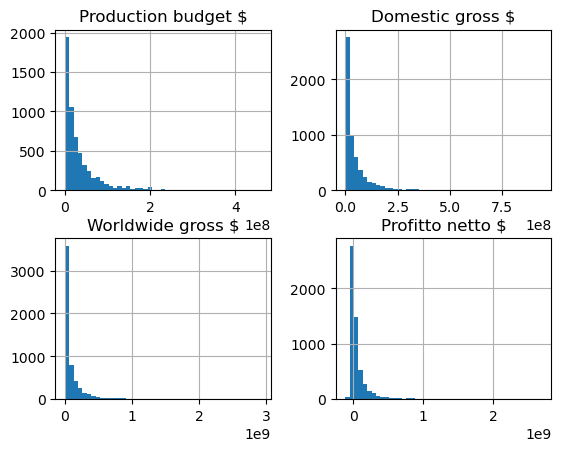

In [35]:
import plotly.express as px
budget_finale[['Production budget $','Domestic gross $', 'Worldwide gross $', 'Profitto netto $']].hist(bins=45)


In [36]:
budget_finale[['Production budget $','Domestic gross $', 'Worldwide gross $', 'Profitto netto $']].describe()

,Production budget $,Domestic gross $,Worldwide gross $,Profitto netto $
count,5.630000e+03,5.630000e+03,5.630000e+03,5.630000e+03
mean,3.477138e+07,4.684674e+07,1.035190e+08,6.874760e+07
std,4.401940e+07,7.355094e+07,1.921911e+08,1.621517e+08
min,5.000000e+04,2.640000e+02,4.230000e+02,-1.104502e+08
25%,6.900000e+06,4.367232e+06,8.607724e+06,-1.569116e+06
50%,2.000000e+07,2.158880e+07,3.583631e+07,1.394767e+07
75%,4.500000e+07,5.738641e+07,1.115134e+08,7.149910e+07
max,4.600000e+08,9.366622e+08,2.923706e+09,2.686706e+09


 ## Sembrerebbe, come del resto abbiamo osservato nel df di IMDb, che siano di più i film con un ritorno molto vicino allo 0, che i film  che vanno in profit.

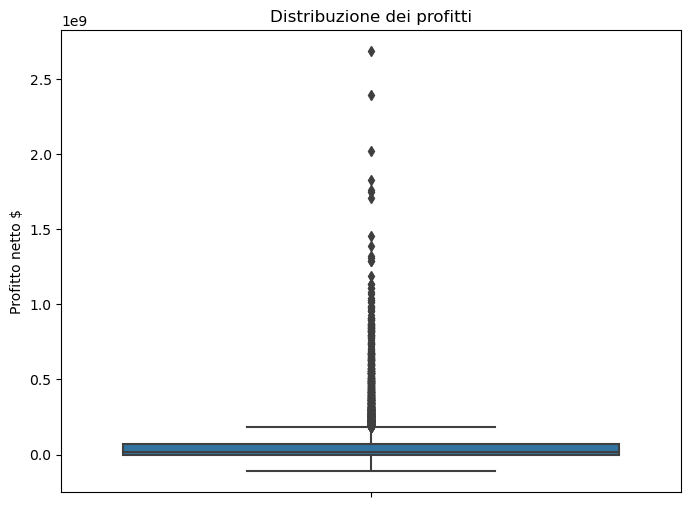

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data=budget_finale, y="Profitto netto $", showfliers=True, ax=ax)
ax.set_title("Distribuzione dei profitti")

plt.show()


# FASE V 

### CHI SONO I MIGLIORI 50 REGISTI SECONDO IL PUBBLICO, QUANTO SPENDONO IN MEDIA PER GIRARE UN FILM? 
In questa parte finale dello studio:
- Faremo, lo prometto, l'ultimo merge tra il budget the Numbers scrapato e il df pulito di IMDb: otterremo così un df di circa 5/6k righe(perchè questo è il numero del df di the numbers col budget), missing values permettendo, relativi ai migliori film di sempre secondo il pubblico ed il relativo budget
- Creeremo una cross table, dopo aver costruito un indice, per capire chi sono i 50 migliori registi, secondo il pubblico, nell'olimpo del cinema.
- Analizzeremo qualche statistica finale

In [38]:
top_5000=completissimo  
top_5000["titoloMINUSC"]=top_5000["originalTitle"].str.lower() 
top_film=top_5000[["titoloMINUSC","INDICATORE_GRADIMENTO","primaryName","genres","birthYear","runtimeMinutes","numVotes"]]


In [39]:
budget_finale["titoloMINUSC"]=budget_finale["Titoli"].str.lower()


C:\Users\utente\AppData\Local\Temp\ipykernel_19888\3403644302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_finale["titoloMINUSC"]=budget_finale["Titoli"].str.lower()


## Merge finale! 

In [40]:
mergiato=pd.merge(top_film,budget_finale, on="titoloMINUSC", how="inner")

#eliminiamo i duplicati che sarebbero remake di alcuni film che eliminiamo per evitare che il budget si duplichi.
mergiato.drop_duplicates(subset=["titoloMINUSC"],keep="first", inplace=True)


## Classifica dei migliori film con budget e incasso netto!

In [41]:
mergiato.columns
film_completo=mergiato[['titoloMINUSC','Data di produzione','INDICATORE_GRADIMENTO','primaryName', "birthYear","genres",'numVotes','runtimeMinutes','Production budget $',"Domestic gross $",'Worldwide gross $','Profitto netto $',]]
film_completo.sort_values(by="INDICATORE_GRADIMENTO", ascending=False)
film_completo=film_completo.rename(columns={"primaryName":"Regista"})
film_completo.sort_values(by="INDICATORE_GRADIMENTO", ascending=False)

,titoloMINUSC,Data di produzione,INDICATORE_GRADIMENTO,Regista,birthYear,genres,numVotes,runtimeMinutes,Production budget $,Domestic gross $,Worldwide gross $,Profitto netto $
2915,the shawshank redemption,1994-09-23,9.300000,Frank Darabont,1959,Drama,2695887.0,142.0,25000000.0,28241469.0,2.841916e+07,3.419159e+06
5546,the dark knight,2008-07-11,8.994116,Christopher Nolan,1970,"Action,Crime,Drama",2669915.0,152.0,185000000.0,534987076.0,1.006234e+09,8.212342e+08
1473,the godfather,1972-03-15,8.973035,Francis Ford Coppola,1939,"Crime,Drama",1870922.0,175.0,7000000.0,136479994.0,2.700074e+08,2.630074e+08
3862,the lord of the rings: the return of the king,2003-12-17,8.773485,Peter Jackson,1961,"Action,Adventure,Drama",1857170.0,201.0,94000000.0,377845905.0,1.120211e+09,1.026211e+09
2908,pulp fiction,1994-09-10,8.741069,Quentin Tarantino,1963,"Crime,Drama",2069502.0,154.0,8000000.0,107928762.0,2.128918e+08,2.048918e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
4717,lottery ticket,2010-08-20,0.580827,C.V. Rajendran,\N,\N,6.0,119.0,17000000.0,24719879.0,2.471988e+07,7.719879e+06
3542,glass,2019-01-17,0.579497,Chris Kennedy,1948,Thriller,24.0,93.0,20000000.0,111048468.0,2.469990e+08,2.269990e+08
150,the dictator,2012-05-16,0.534587,James Cruze,1884,"Adventure,Comedy,Drama",21.0,60.0,65000000.0,59650222.0,1.801489e+08,1.151489e+08
7403,the other side of the door,2016-02-24,0.489682,Ira Farmer,\N,Drama,9.0,90.0,5000000.0,3000342.0,1.290511e+07,7.905107e+06


## Che impatto ha il budget sulla qualità dei film: esiste una relazione tra gradimento da parte del pubblico e incasso netto? l'indicatore di gradimento varia al variare di quanto si incassa al botteghino?
Per quanto riguarda l'olimpo dei film sembrerebbe non esistere una relazione significativa tra incasso e gradimento. La gente sembrerebbe, in generale, apprezzare i top movies indipendentemente sia dal budget (comuqnue tendenzialmente molto alto per questi livelli) che dai relatvi incassi.


In [42]:
film_completo.corr()

,INDICATORE_GRADIMENTO,numVotes,runtimeMinutes,Production budget $,Domestic gross $,Worldwide gross $,Profitto netto $
INDICATORE_GRADIMENTO,1.000000,0.652670,0.453683,0.218163,0.329910,0.305843,0.302536
numVotes,0.652670,1.000000,0.318300,0.376245,0.536948,0.520562,0.513579
runtimeMinutes,0.453683,0.318300,1.000000,0.232972,0.193894,0.199644,0.172542
Production budget $,0.218163,0.376245,0.232972,1.000000,0.678976,0.737432,0.598916
Domestic gross $,0.329910,0.536948,0.193894,0.678976,1.000000,0.940030,0.927542
Worldwide gross $,0.305843,0.520562,0.199644,0.737432,0.940030,1.000000,0.982545
Profitto netto $,0.302536,0.513579,0.172542,0.598916,0.927542,0.982545,1.000000


## Approfondiamo la relazione tra gradimento e incasso e tra gradimento e minutaggio, analizzando il tutto attraverso il genere principlae
Inanzitutto straiamo il  Genere principale per ogni film (es. da "Drama,History" estraggo solo Drama) e poi rappresentiamo graficamente le relazioni

In [43]:
#estraiamo il genere principale
film_completo["Main_Genere"]=film_completo["genres"].str.split(",")\
    .str[0]\
    .str.strip()

film_completo["Main_Genere"].value_counts()

Comedy         1258
Action         1160
Drama          1013
Adventure       474
Crime           346
Biography       305
Horror          238
Documentary      81
Fantasy          24
Animation        23
Mystery          19
Thriller         18
Western          15
Adult            12
Family           11
\N               10
Musical           7
Sci-Fi            6
Romance           5
Film-Noir         1
Music             1
Name: Main_Genere, dtype: int64

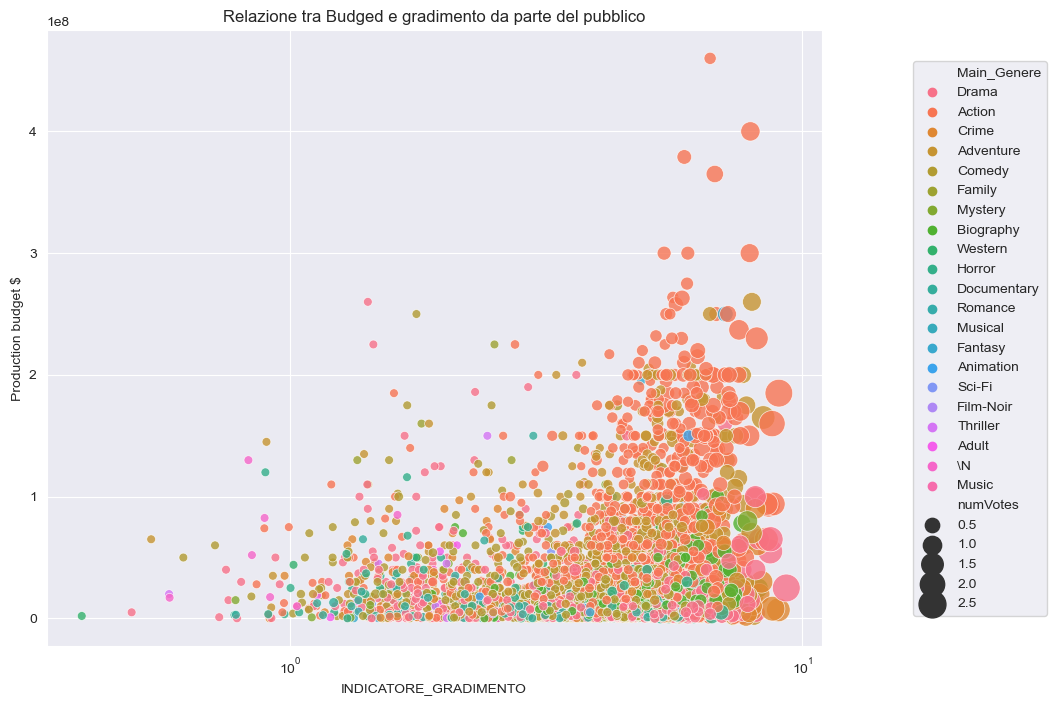

In [44]:
import seaborn as sns

sns.set_style("darkgrid")

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=film_completo, x="INDICATORE_GRADIMENTO", y="Production budget $", 
                          hue="Main_Genere", size="numVotes", sizes=(40, 400), alpha=0.8)

scatter.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.xscale("log")
plt.title("Relazione tra Budged e gradimento da parte del pubblico")
plt.show()



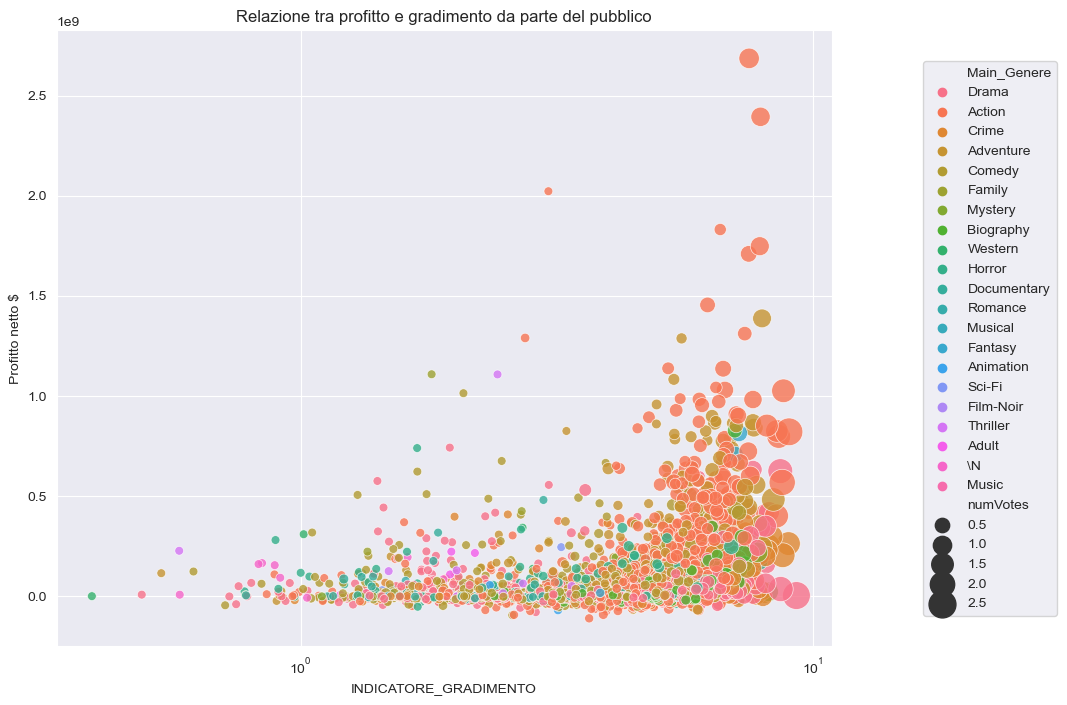

In [45]:



plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=film_completo, x="INDICATORE_GRADIMENTO", y="Profitto netto $", 
                          hue="Main_Genere", size="numVotes", sizes=(40, 400), alpha=0.8)

scatter.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.xscale("log")
plt.title("Relazione tra profitto e gradimento da parte del pubblico")
plt.show()

Text(0.5, 1.0, 'Relazione tra gradimento e durata del film')

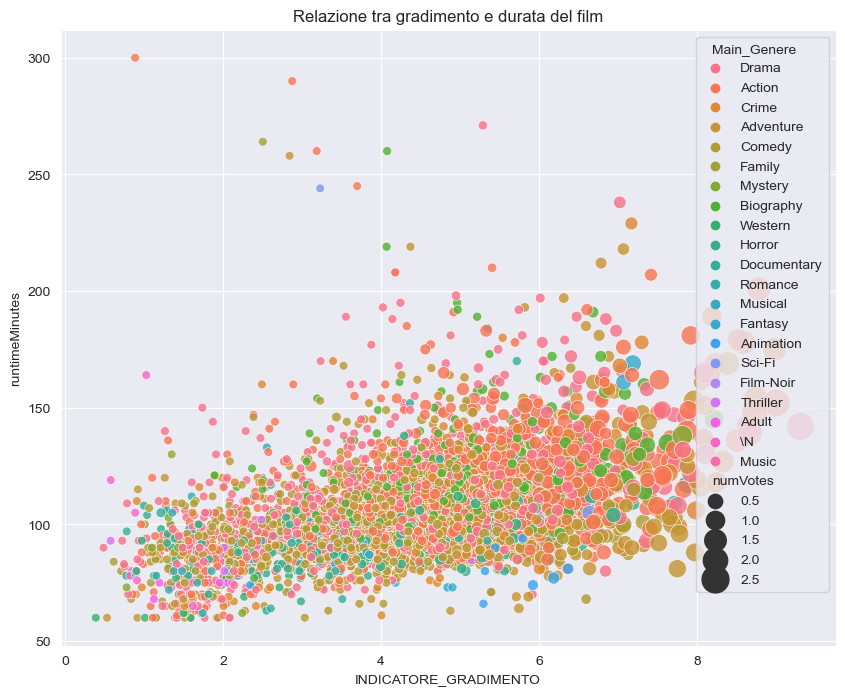

In [46]:
plt.figure(figsize=(10, 8))
scatter2 = sns.scatterplot(data=film_completo, x="INDICATORE_GRADIMENTO", y="runtimeMinutes", 
                          hue="Main_Genere", size="numVotes", sizes=(40, 400), alpha=0.8)
plt.title("Relazione tra gradimento e durata del film")


## Domanda bonus: nell'olimpo del cinema sono di più i film che incassano o quelli in perdita?

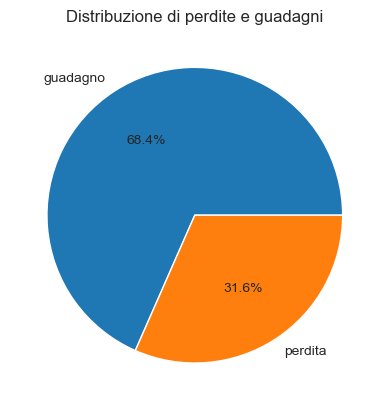

In [47]:
perdita_guadagno=film_completo
perdita_guadagno["p/g"]=perdita_guadagno["Profitto netto $"].apply(lambda x:"perdita" if x < 0 else "guadagno")

pg_counts=perdita_guadagno["p/g"].value_counts()


plt.pie(pg_counts, labels=pg_counts.index, autopct='%1.1f%%')
plt.title("Distribuzione di perdite e guadagni")
plt.show()

Text(0.5, 1.0, 'Distribuzione profitti')

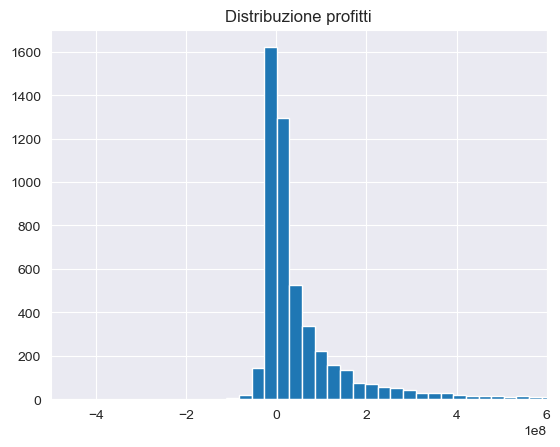

In [48]:
perdita_guadagno["Profitto netto $"].hist(bins=100)
plt.xlim(-500000000, 600000000)

plt.title("Distribuzione profitti")

# Chi sono i registi più apprezzati e quanto costano in media i loro film?
- creiamo anche qui un punteggio che dia peso non solo al gradimento medio per ogni film, dato che ci sono molti registi con un voto alto ma con pochissimi film alle spalle(guarda il grafico sottostante per capire meglio), ma anche al numero di film girati e alla profittabilità media di ogni regista. Per fare il tutto normalizziamo col metodo minmax tutte e 3 le varibaili e poi calcoliamone la media per costruire un indicatore di gradimento per la regia

Text(0.5, 1.0, 'distribuzione film per regista : sono di più i registi che hanno girato un solo film')

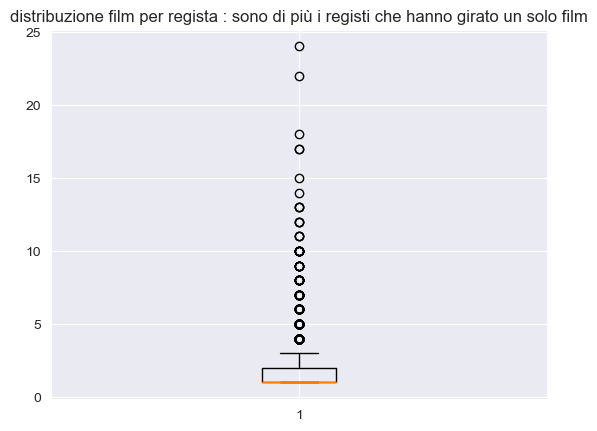

In [49]:
import matplotlib.pyplot as plt
registi=film_completo.loc[(film_completo["Regista"]!="-")]\
                    .groupby("Regista")\
                    .agg({"titoloMINUSC":"count","INDICATORE_GRADIMENTO":"mean","Production budget $":"mean","Profitto netto $":"mean"})\
                    .rename(columns={"titoloMINUSC":"numero film girati","INDICATORE_GRADIMENTO":"gradimento medio"})\
                    .reset_index()

plt.boxplot(registi["numero film girati"])
plt.title("distribuzione film per regista : sono di più i registi che hanno girato un solo film")



## Costruzione dell'indicatore di gradimento per  per la regia:
L'indicatore sara la sintesi di tre indici:
- 1° totale dei film girati per ogni regista in log
- 2° indice di gradimento medio
- 3° incasso netto medio al botteghino (quest'ultimo normalizzato col logaritmo, date le discrepanze tra gli incassi)

In [50]:
#calcoliamo il log dei film girati e normalizziamolo
registi["tot_film_LOG"] =np.log(registi["numero film girati"])
registi["tot_film_mimax_log"]=(registi["tot_film_LOG"]-registi["tot_film_LOG"].min())/(registi["tot_film_LOG"].max()-registi["tot_film_LOG"].min())

#per ritornare in range 0-1 dividiamo il gradimento medio per 10 
registi["gradimento_norm"]=registi["gradimento medio"]/10 

In [60]:
registi["log_profitto"]=np.log(registi["Profitto netto $"])

#i valori nulli sono i valori che sono andati in negativo: rimpiazziamoli con lo zero
registi["log_profitto"].isna().sum()
registi["log_profitto"]=registi["log_profitto"].fillna(0)

#scaling per il massimo:
registi["profitto_log_NORM"]=registi["log_profitto"]/max(registi["log_profitto"])


In [52]:
#indicatore gradimento regista: moltiplichiamo i tre indici
registi["indicatore_gradimento_regista"]=registi["tot_film_mimax_log"]*registi["gradimento_norm"]*registi["profitto_log_NORM"]


## La top 50 dei migliori registi secondo il publlico: con budget e profitto medio annesso!
Steven Spielberg, Clin Eastwood e Cristopher Nolan sul podio: ecco i 50 registi più apprezzati dal pubblico!

In [53]:
top_registi=registi[["Regista","indicatore_gradimento_regista","numero film girati","Production budget $","Profitto netto $"]]\
    .sort_values(by="indicatore_gradimento_regista", ascending=False)\
    .reset_index()\
    .head(50)
top_registi.drop(columns="index", inplace=True)
top_registi

,Regista,indicatore_gradimento_regista,numero film girati,Production budget $,Profitto netto $
0,Steven Spielberg,0.594551,24,6.552083e+07,3.228439e+08
1,Clint Eastwood,0.473315,22,3.744545e+07,8.130864e+07
2,Christopher Nolan,0.470663,7,1.621429e+08,4.505127e+08
3,Ridley Scott,0.462736,18,6.784444e+07,9.964311e+07
4,Peter Jackson,0.453526,8,1.351250e+08,6.080661e+08
5,Robert Zemeckis,0.434837,11,7.227273e+07,2.110716e+08
6,David Fincher,0.428542,8,7.237500e+07,1.613030e+08
7,James Cameron,0.423181,7,1.414857e+08,7.744592e+08
8,Sam Raimi,0.418946,12,9.323958e+07,2.575157e+08
9,Martin Scorsese,0.417283,13,4.165385e+07,4.093317e+07


# <center> CONCLUSIONI & CONSIDERAZIONI PERSONALI:

Tra i vari dati analizzati, uno di quelli che ho trovato più interessante è che dall'analisi sembrerebbe non emergere una relazione significativa tra il budget di un film e il gradimento da parte del pubblico. Questo risultato smentisce  l'idea comune secondo cui un grande investimento sia garanzia di successo e dimostra che, anche per quanto riguarda l'olimpo del cinema, la componente vincente non sono né i grossi budget né i grandissimi incassi, ma bensì la forza intrinseca dell'arte.


 Personalmente, sono convinto che il cinema sia una delle forme d'arte più potenti e universali che esistano. Grazie alla sua capacità di emozionare, informare e intrattenere, il cinema riesce a coinvolgere persone di ogni età, genere, cultura e provenienza, attraverso un linguaggio visivo che supera le barriere linguistiche e culturali. La sua capacità di unire le persone e di farle entrare in contatto con realtà diverse dalla propria è uno dei suoi maggiori meriti, che lo rende un'arte capace di superare il tempo e lo spazio, e di avere un impatto duraturo sul pubblico. Inoltre, il cinema è in continua evoluzione, con nuove tecniche, stili e formati che lo mantengono sempre fresco e interessante. Per tutte queste ragioni, penso che il cinema rimarrà un'arte immortale e di grande importanza culturale per molto tempo a venire.

Spero, infine, che questo studio sia stato chiaro ed interessante.
Ci vediamo presto con la prossima pubblicazione

L'autore: Alessandro Lo Bello